In [1]:
from src.dl.inference.inferer import Inferer
import src.dl.lightning as lightning
from src.config import CONFIG

In [2]:
lightning_model = lightning.SegModel.from_experiment(name="baseline_pannuke", version="hover")

inferer = Inferer(
    lightning_model,
    dataset="pannuke",
    patch_size=(256, 256),
    stride_size=80,
    fn_pattern="*",
    data_fold="test",
    model_weights="last",
    apply_weights=False,
    post_proc_method="hover"
)

In [3]:
# lightning_model

In [4]:
inferer.run_inference()

Inference: /home/local/leos/Dippa/datasets/data/pannuke/test/images: 100%|██████████| 341/341 [00:36<00:00,  9.34batch/s, patches=2722/2722]


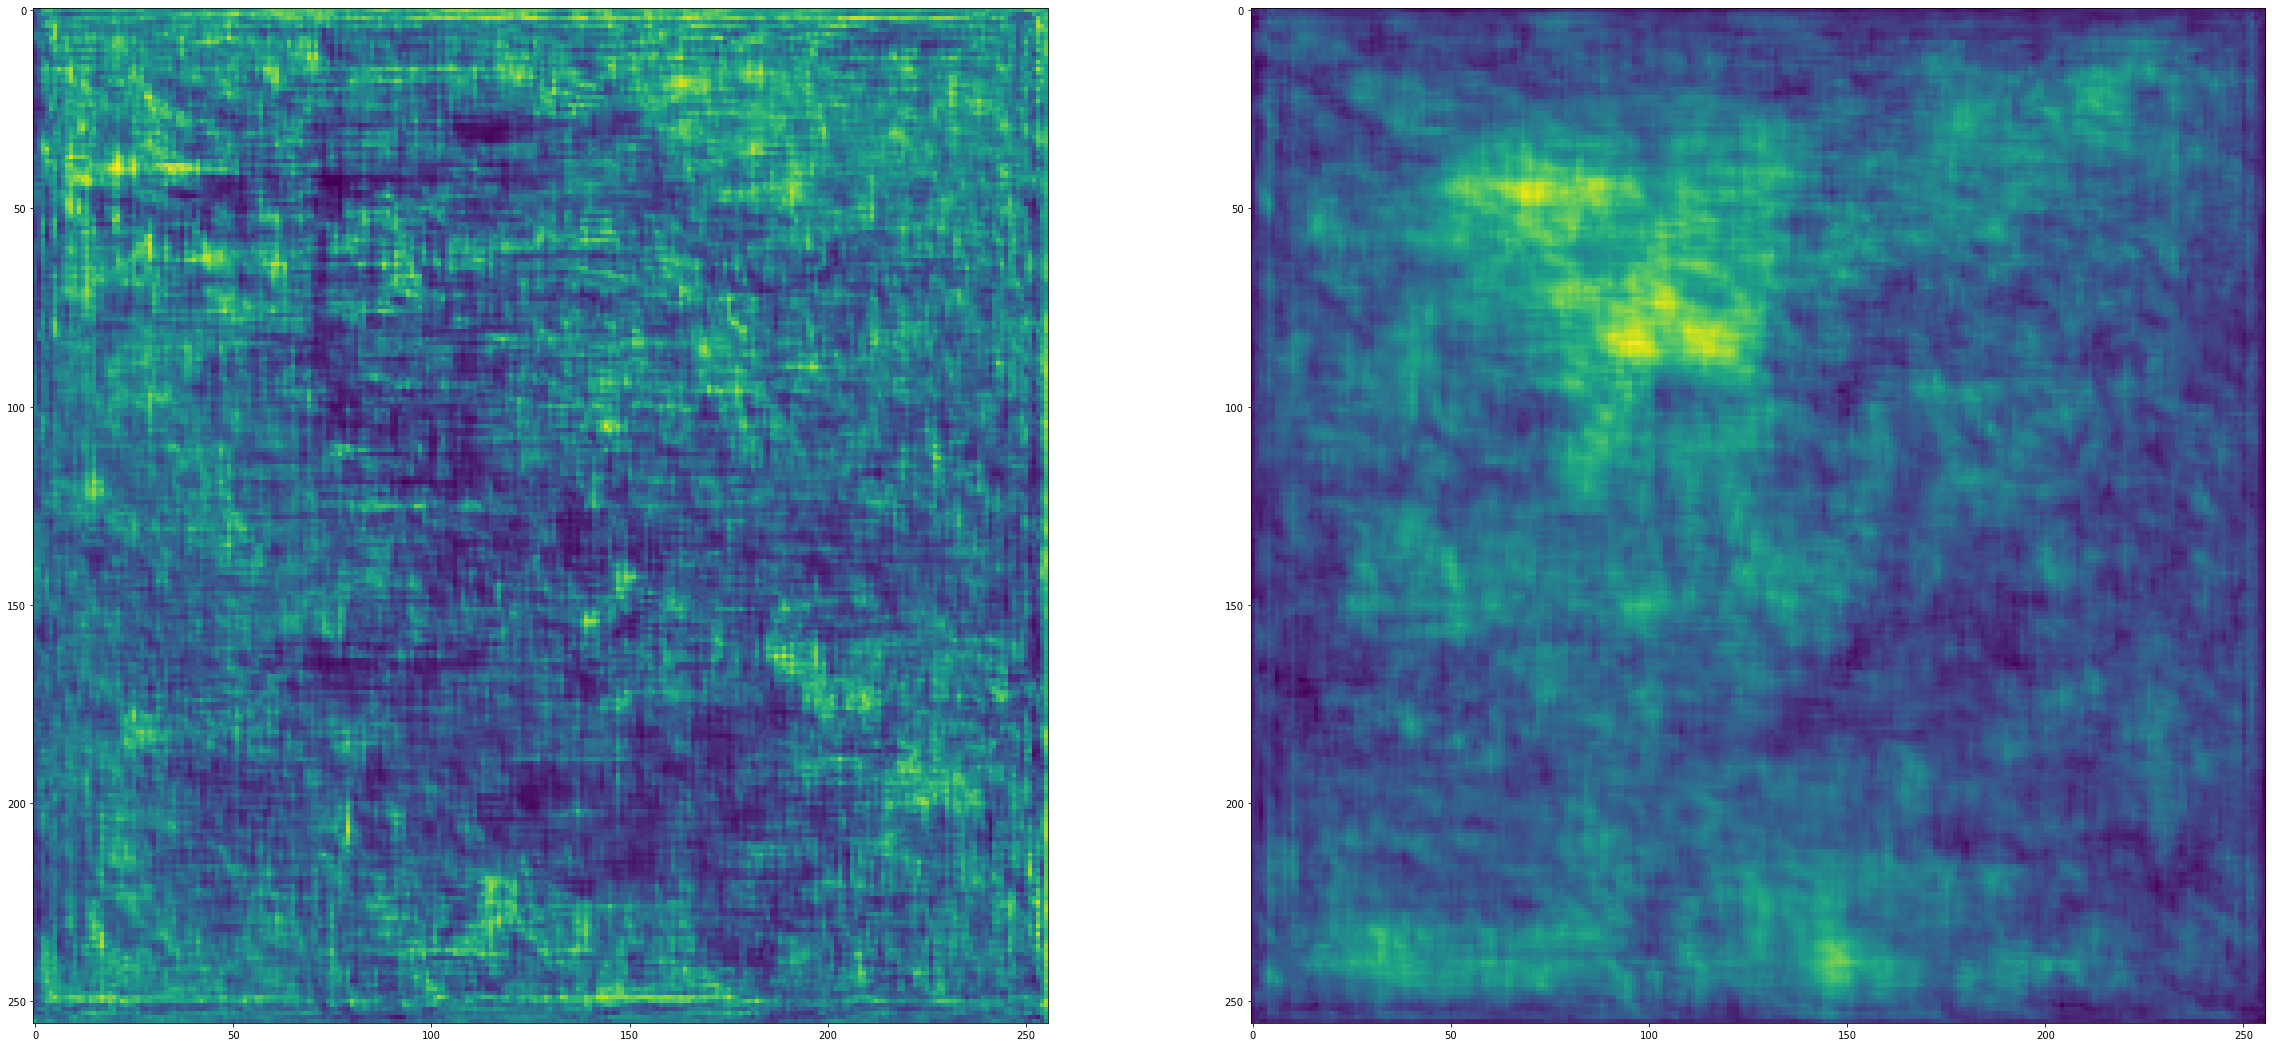

In [5]:
import matplotlib.pyplot as plt 
from skimage.color import label2rgb

key = "Breast_fold3_420"
fig, ax = plt.subplots(1, 2, figsize=(40, 40))
ax[0].imshow(inferer.soft_insts[key][..., 1])
ax[1].imshow(inferer.aux_maps[key][..., 0])

In [7]:
inferer.post_process()

100%|██████████| 14/14 [01:49<00:00,  7.83s/it]


In [10]:
pattern_list = None
binary_scores = inferer.benchmark_insts(pattern_list=pattern_list, file_prefix="testi")
binary_scores

100%|██████████| 14/14 [01:28<00:00,  6.33s/it]


,AJI,AJI_plus,DICE2,PQ,SQ,DQ,inst_recall,inst_precision,splits,merges
name,,,,,,,,,,
test_1,0.466261,0.530545,0.440192,0.459939,0.714734,0.643510,0.610405,0.680412,0.908794,0.576704
test_10,0.479532,0.517102,0.456290,0.466266,0.717170,0.650147,0.652071,0.648235,1.370309,0.390662
test_11,0.307506,0.449820,0.381087,0.311920,0.705104,0.442375,0.352832,0.592824,1.004397,0.744484
test_12,0.598967,0.629508,0.574408,0.532811,0.729066,0.730813,0.745327,0.716854,0.703523,0.286949
test_13,0.519900,0.575264,0.598911,0.494015,0.757511,0.652156,0.584253,0.737918,1.032597,0.690005
test_14,0.518742,0.545651,0.570007,0.499673,0.752414,0.664093,0.773381,0.581867,1.649897,0.299604
test_2,0.453516,0.469258,0.646399,0.382577,0.719610,0.531646,0.685714,0.434109,0.960239,0.314482
test_3,0.516372,0.593591,0.485472,0.481299,0.763674,0.630241,0.629442,0.631043,0.699825,0.526979
test_4,0.530906,0.596674,0.487227,0.466662,0.766134,0.609113,0.607656,0.610577,0.882027,0.560657


In [14]:
pattern_list = None
type_scores = inferer.benchmark_types(pattern_list=pattern_list, file_prefix="testi")
type_scores = type_scores[type_scores.index.str.contains("avg")]
type_scores

100%|██████████| 2722/2722 [00:10<00:00, 260.56it/s]


,AJI,AJI_plus,DICE2,PQ,SQ,DQ,inst_recall,inst_precision,splits,merges
name,,,,,,,,,,
neoplastic_avg_for_the_set,0.550523,0.564279,0.713839,0.528140,0.781681,0.629511,0.653826,0.645490,3.715350e-01,0.359930
inflammatory_avg_for_the_set,0.311180,0.314832,0.561450,0.350691,0.537572,0.416699,0.427901,0.467037,1.080225e-01,0.120630
connective_avg_for_the_set,0.331191,0.333350,0.611216,0.340060,0.595625,0.425538,0.440532,0.474239,1.332037e-01,0.200143
dead_avg_for_the_set,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.097403e-17,0.219942
epithelial_avg_for_the_set,0.513172,0.521623,0.664420,0.507428,0.739852,0.623251,0.636081,0.657981,3.011833e-01,0.342391
